# Entrenando Algoritmos de Machine Learning para Clasificación

# Implementando un algoritmo de aprendizaje tipo Perceptrón en Python: Una API de Perceptrón orientada a Objetos

In [ ]:
import numpy as np


class Perceptron(object):
    """Clasificador basado en perceptron.

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
       Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: matriz-1d (1d-array)
       Pesos después del fitting.
     errors_: list
       Número de clasificaciones erróneas (actualizaciones) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = target - self.predict(xi)  ### EJERCICIO 1: CALCULAR LA ACTUALIZACION DE PESOS <<<<<--------------------
                self.w_[1:] += update * xi
                self.w_[0] += update  # TODO: PREGUNTAR PROFE
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Entrenando un modelo de Perceptrón en el conjunto de datos Iris

### Leyendo el dataset Iris

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
# df.to_csv('iris.data')  # Para guardar en el directorio actual
# df = pd.read_csv('iris.data', header=None)  # Cargar desde el repositorio
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

### Nota:
Si tenéis el fichero ya descargado en un directorio local, por ejemplo en "your/local/path/to/iris.data" podéis sustituir la anterior línea de código...

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

por...

    df = pd.read_csv('your/local/path/to/iris.data', header=None)


<hr>

### Pintando los datos de Iris

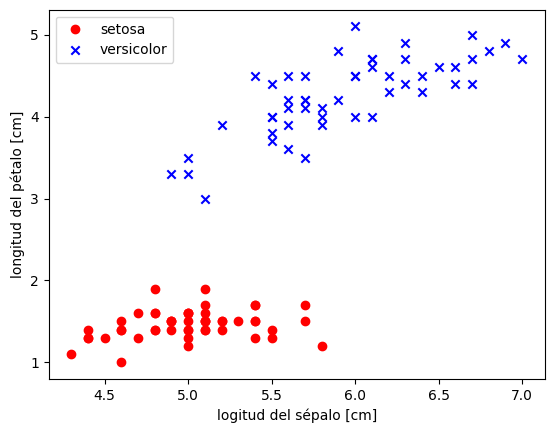

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# selecciona setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extrae longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

# pintando los datos
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('logitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Entrenando el modelo Perceptrón

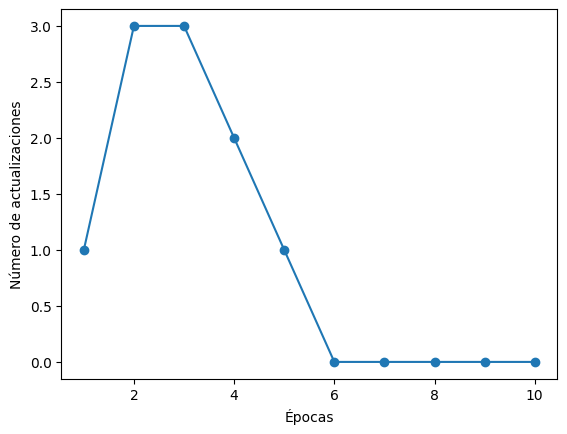

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10) ### EJERCICIO 2: CREA UN PERCEPTRON CON TASA DE APRENDIZAJE 0.1 Y 10 ITERACIONES <<<<<--------------------

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### EJERCICIO 3: EXPLICA LA GRÁFICA ANTERIOR <<<<<--------------------
La gráfica anterior nos indica que a partir de la iteración 6 los pesos no se actualizan, esto se debe a que a que a partir de la sexta iteración el perceptrón predice bien la etiqueta de clase.\
Hasta ese instante, cuando ocurren casos de predicción errónea los pesos se ven empujados hacia la dirección de la clase de destino negativa o positiva, según la regla de Hebb.

### Una función para pintar las regiones de decisión

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # configuramos el generador de marcadores y mapa da colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # traza/pinta la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # pinta las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/var/folders/b_/3xd9dj1x65l095882xsl1nlr0000gn/T/ipykernel_82884/3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


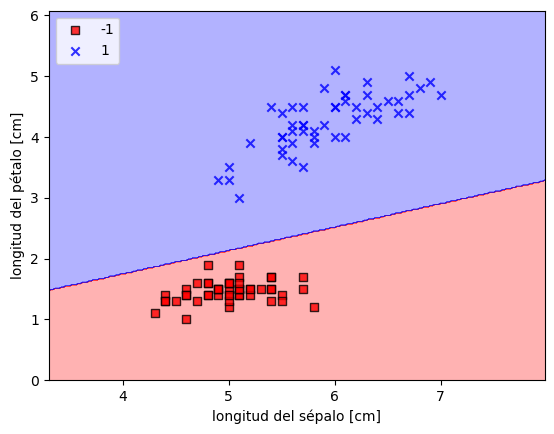

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### EJERCICIO 4: EXPLICA LA GRÁFICA ANTERIOR <<<<<--------------------
Observamos que en el problema clasificar entre los dos grupos Iris-setosa e Iris-versicolor, las dos clases son linealmente separables.\
En la gráfica una recta permite separar los dos grupos, esto es vital para el modelo de perceptrón ya que en caso contrario su convergencia no estaría garantizada.

# Neurona lineales Adaptativas (ADALINE) y la convergencia del aprendizaje: Implementando una ADALINE en Python

In [ ]:
class AdalineGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Tened en cuenta que el método de "activation" no tiene ningún efecto
            # en el código ya que es simplemente una función de identidad. Nosotros
            # podría escribir `output = self.net_input(X)` directamente en su lugar.
            # El propósito del activation es más conceptual, es decir,
            # en el caso de la regresión logística, podríamos cambiarlo a
            # una función sigmoidea para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors = y - output ### EJERCICIO 5: CALCULA EL ERROR <<<<<--------------------
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Computar la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

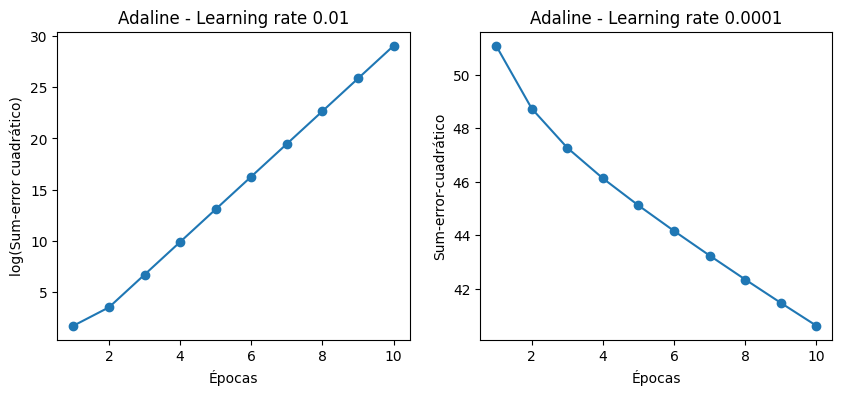

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(eta=0.01, n_iter=10) ### EJERCICIO 6: Crea y entrena con los datos de entrenamiento y sus etiquetas un Adaline de Gradiente Descendente
ada1.fit(X, y) ### con 10 iteraciones y una tasa de aprendizaje de 0.01 <<<<<--------------------<<<<<--------------------<<<<<-----------------
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(Sum-error cuadrático)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Sum-error-cuadrático')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### EJERCICIO 7: EXPLICA LAS DOS GRÁFICAS ANTERIORES <<<<<--------------------

El learning rate de la priméra gráfica es demasiado alto y genera el problema de saltarnos el mínimo de la función de pérdida debido a que la función diverge.

En el otro caso el lerning rate es muy bajo entonces los pesos se actualizan muy lento por lo que la función converge lento o el poblema podría estar en que se haya entrenado con pocas épocas.

## Mejorando el Gradiente Descendente con escalado de características

In [ ]:
# Estandarizar características
X_std = np.copy(X)
X_std, np.min(X_std[:, 0]), np.max(X_std[:, 0])
X_std[:, 0] = (X_std[:, 0] - np.min(X_std[:, 0])) / (np.max(X_std[:, 0]) - np.min(X_std[:, 0])) ### EJERCICIO 8: ESTANDARIZA LAS CARACTERÍSTICAS <<<<<--------------------
X_std[:, 1] = (X_std[:, 1] - np.min(X_std[:, 1])) / (np.max(X_std[:, 1]) - np.min(X_std[:, 1])) ### EJERCICIO 8: ESTANDARIZA LAS CARACTERÍSTICAS <<<<<--------------------
print(X_std)

[[0.2962963  0.09756098]
 [0.22222222 0.09756098]
 [0.14814815 0.07317073]
 [0.11111111 0.12195122]
 [0.25925926 0.09756098]
 [0.40740741 0.17073171]
 [0.11111111 0.09756098]
 [0.25925926 0.12195122]
 [0.03703704 0.09756098]
 [0.22222222 0.12195122]
 [0.40740741 0.12195122]
 [0.18518519 0.14634146]
 [0.18518519 0.09756098]
 [0.         0.02439024]
 [0.55555556 0.04878049]
 [0.51851852 0.12195122]
 [0.40740741 0.07317073]
 [0.2962963  0.09756098]
 [0.51851852 0.17073171]
 [0.2962963  0.12195122]
 [0.40740741 0.17073171]
 [0.2962963  0.12195122]
 [0.11111111 0.        ]
 [0.2962963  0.17073171]
 [0.18518519 0.2195122 ]
 [0.25925926 0.14634146]
 [0.25925926 0.14634146]
 [0.33333333 0.12195122]
 [0.33333333 0.09756098]
 [0.14814815 0.14634146]
 [0.18518519 0.14634146]
 [0.40740741 0.12195122]
 [0.33333333 0.12195122]
 [0.44444444 0.09756098]
 [0.22222222 0.12195122]
 [0.25925926 0.04878049]
 [0.44444444 0.07317073]
 [0.22222222 0.12195122]
 [0.03703704 0.07317073]
 [0.2962963  0.12195122]


/var/folders/b_/3xd9dj1x65l095882xsl1nlr0000gn/T/ipykernel_82884/3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


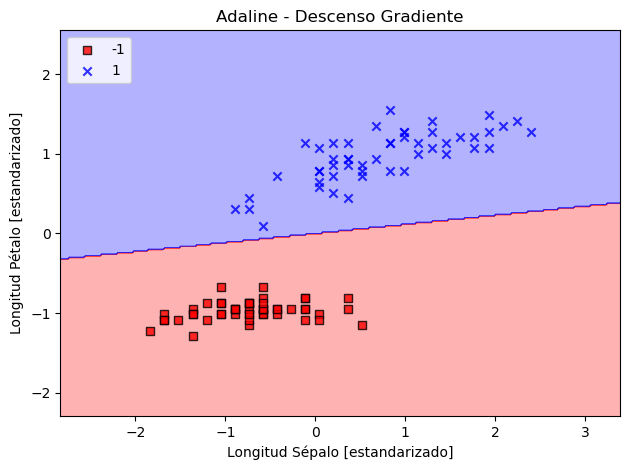

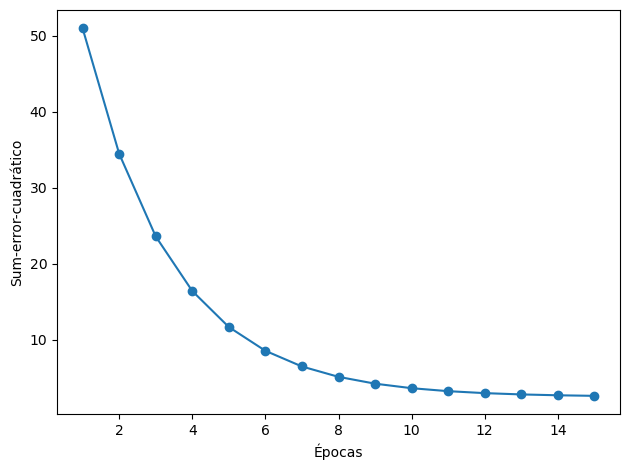

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Sum-error-cuadrático')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

### EJERCICIO 9: EXPLICA LAS DOS GRÁFICAS ANTERIORES <<<<<--------------------
En la primera gráfica se pueden ver que los datos están estandarizados.
Como los datos están estandarizados, podemos obserservar en la segunda gráfica como la función de pérdida converge a un ritmo más rápido que en los casos anteriores y aquí si que es capaz de converger ya que en las últimas épocas observamos que hay una mínima mejora.

## Aprendizaje Automático a Gran Escala y Descendiente de Gradiente Estocástico

In [ ]:
class AdalineSGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     shuffle : bool (default: True)
      Si es Verdadero, mezcla los datos de entrenamiento en cada época, para evitar ciclos.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) promediado sobre todas las muestras
       de entrenamiento en cada época.

     """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento sin reinicializar los pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Mezclar los datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Inicializar pesos con pequeños números aleatorios"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Aplicar la regla de aprendizaje de Adaline para actualizar los pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcular la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

/var/folders/b_/3xd9dj1x65l095882xsl1nlr0000gn/T/ipykernel_82884/3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


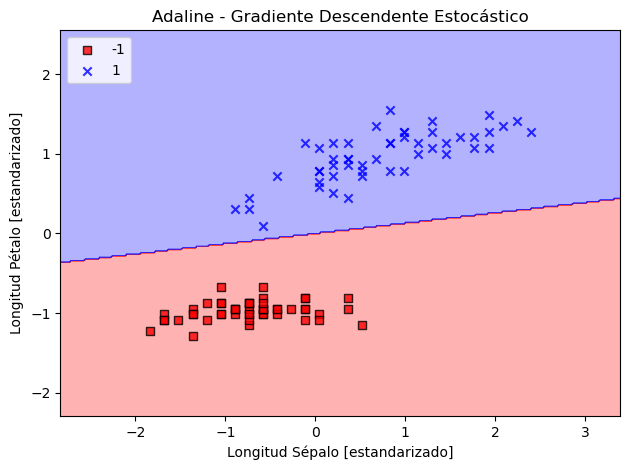

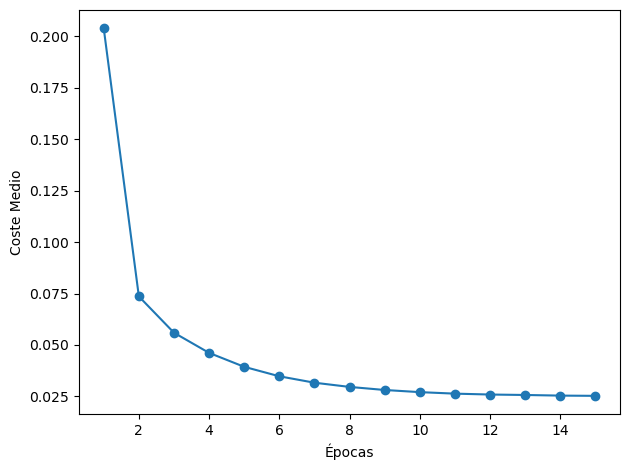

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradiente Descendente Estocástico')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Coste Medio')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

### EJERCICIO 10: EXPLICA LAS DOS GRÁFICAS ANTERIORES <<<<<--------------------NO TERMINADO
En este caso es el coste medio en vez del sumatorio de los costes. En este caso ha convergido más rápido porque ha empleado el gradiente descendente estocastico

In [ ]:
ada.partial_fit(X_std[0, :], y[0])

# Resumen

In [ ]:
! python ../.convert_notebook_to_script.py --input 2_4_Perceptron_y_Adaline.ipynb --output 2_4_Perceptron_y_Adaline.py

python: can't open file '/Users/carlosrabazo/Library/CloudStorage/OneDrive-UFV/23_24/01 APRENDIZAJE AUTOMATICO/05 CODIGO/2 COMPUTACION NEURONAL/../.convert_notebook_to_script.py': [Errno 2] No such file or directory
